# importing the libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pickle

# importing the dataset

In [19]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [20]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# image exploration

36

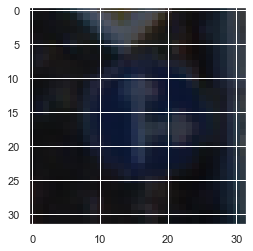

In [21]:
i = 1000
plt.imshow(X_train[i])
y_train[i]

# data normalisation

In [22]:
from sklearn.utils import shuffle
X_train,y_train = shuffle(X_train,y_train)

In [23]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True) 

In [24]:
X_train_gray_norm = (X_train_gray - 128)/128 
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

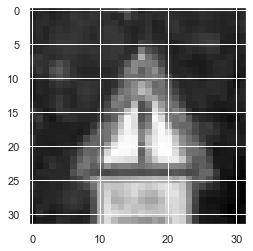

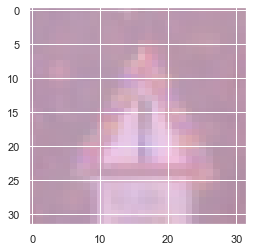

In [25]:
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])


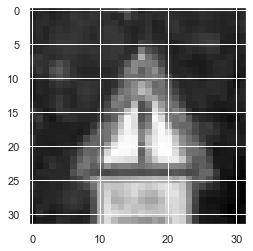

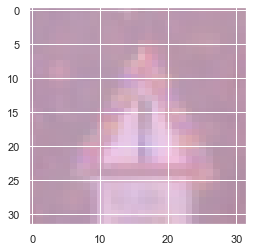

In [26]:
i = 610
plt.imshow(X_train_gray_norm[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])


# building the model

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split


In [28]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))

cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=43, activation = 'softmax'))

# compile the model and train it

In [29]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [30]:
history = cnn_model.fit(X_train_gray_norm,
                        y_train,
                        batch_size=500,
                        epochs=20,
                        verbose=1,
                        validation_data = (X_validation_gray_norm,y_validation))

Epoch 1/20
70/70 [==============================] - 6s 85ms/step - loss: 3.2506 - accuracy: 0.1604 - val_loss: 2.8989 - val_accuracy: 0.2884
Epoch 2/20
70/70 [==============================] - 6s 81ms/step - loss: 1.8389 - accuracy: 0.4917 - val_loss: 1.6291 - val_accuracy: 0.5329
Epoch 3/20
70/70 [==============================] - 6s 80ms/step - loss: 1.0466 - accuracy: 0.7025 - val_loss: 1.1712 - val_accuracy: 0.6562
Epoch 4/20
70/70 [==============================] - 6s 83ms/step - loss: 0.7503 - accuracy: 0.7871 - val_loss: 0.9738 - val_accuracy: 0.7195
Epoch 5/20
70/70 [==============================] - 6s 85ms/step - loss: 0.5897 - accuracy: 0.8376 - val_loss: 0.8406 - val_accuracy: 0.7515
Epoch 6/20
70/70 [==============================] - 6s 88ms/step - loss: 0.4881 - accuracy: 0.8694 - val_loss: 0.7746 - val_accuracy: 0.7841
Epoch 7/20
70/70 [==============================] - 6s 91ms/step - loss: 0.4132 - accuracy: 0.8914 - val_loss: 0.7213 - val_accuracy: 0.7989
Epoch 8/20
70

# model evaluation

In [35]:
score = cnn_model.evaluate(X_test_gray_norm,y_test)
print('test accuracy : {} '.format(score[1]))

395/395 [==============================] - 1s 3ms/step - loss: 0.9446 - accuracy: 0.8428
test accuracy : 0.8427553176879883 


In [36]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

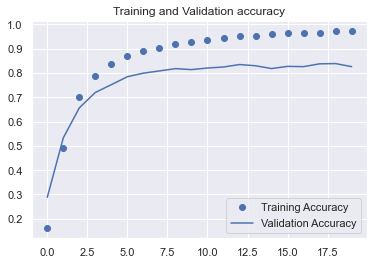

In [37]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()


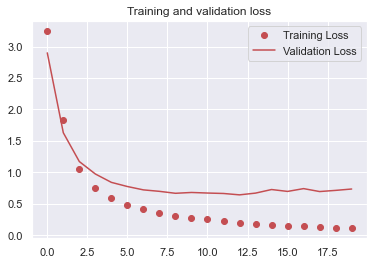

In [38]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [39]:
predicted_classes = cnn_model.predict_classes(X_test_gray_norm)
y_true = y_test

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


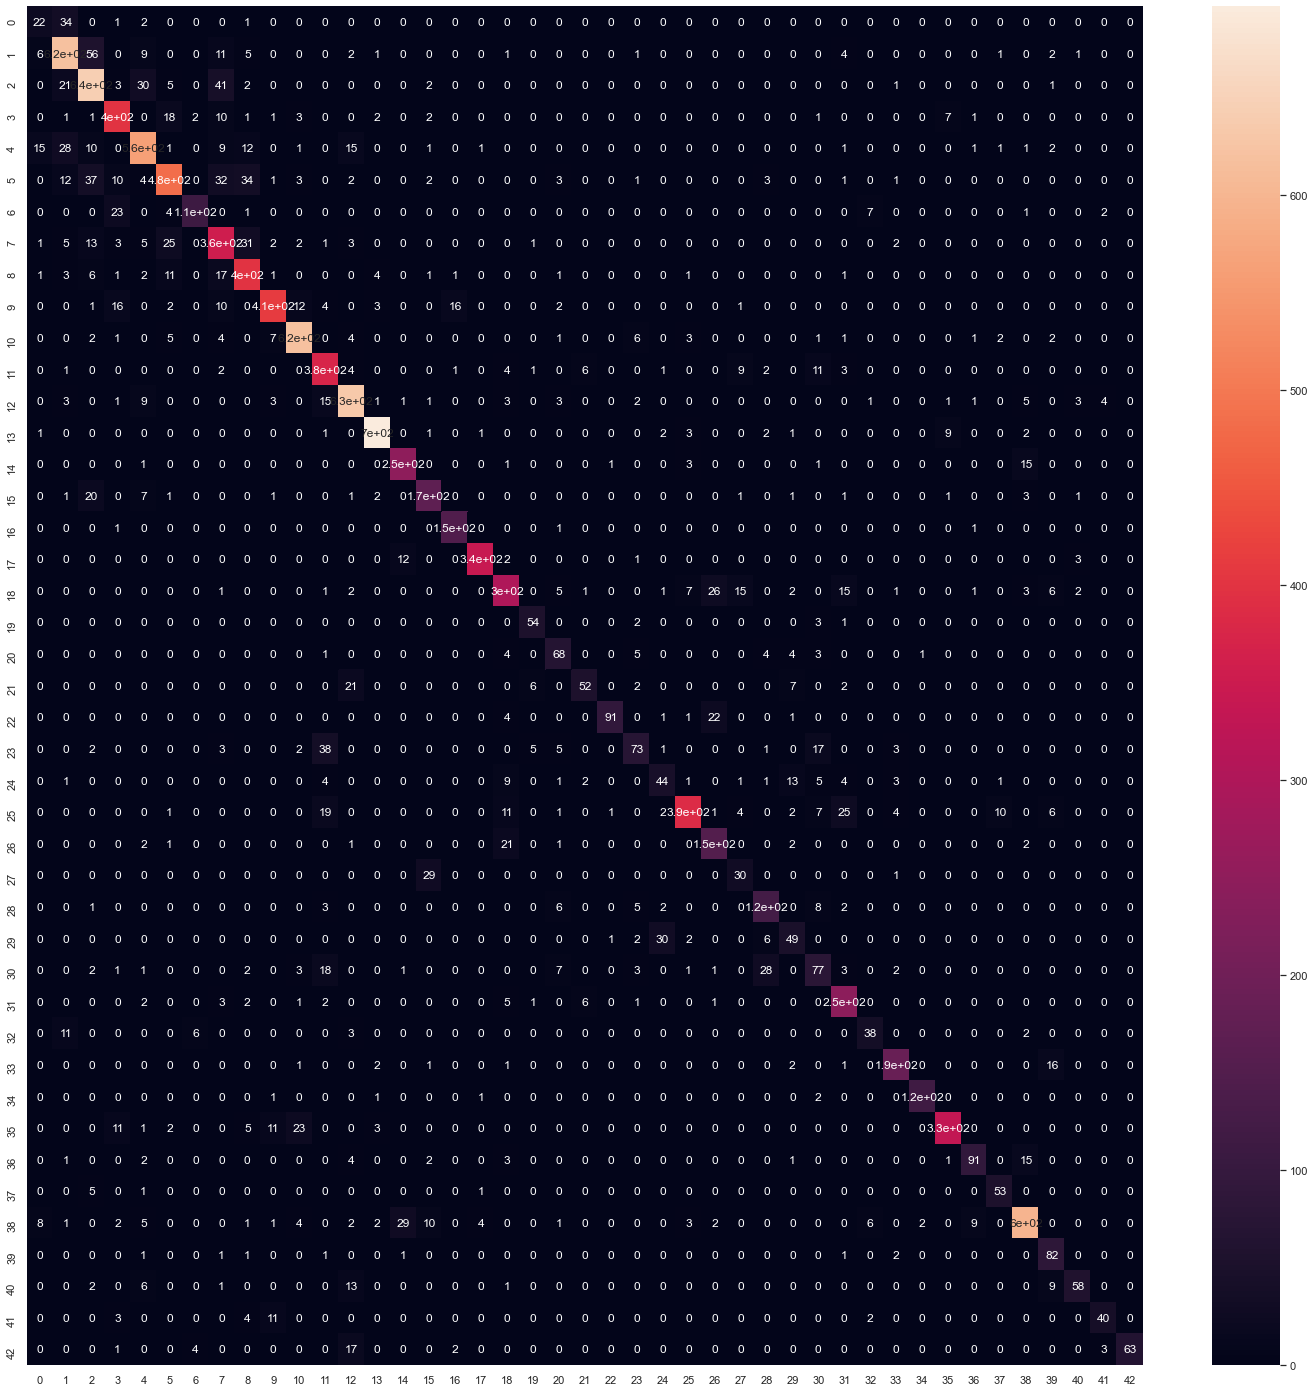

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot=True)

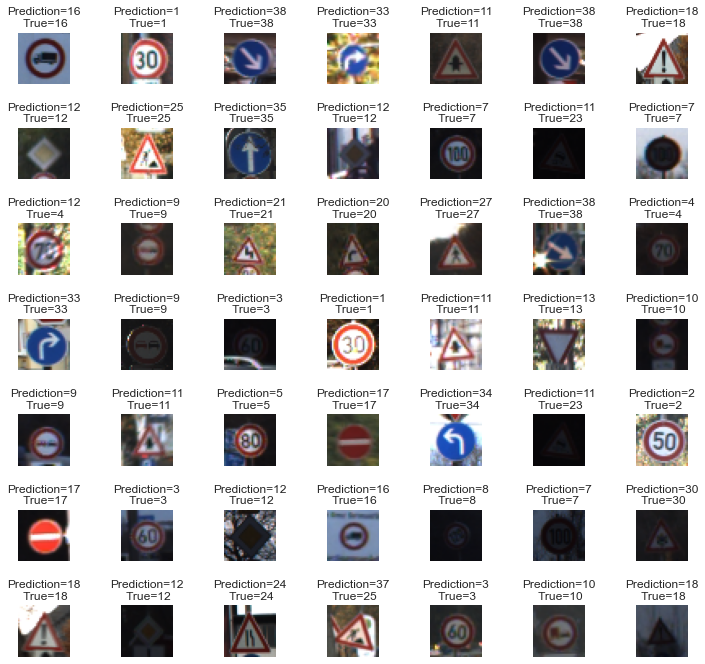

In [42]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)